In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load data into dataframe
file_path = Path('Resources/combineddata.csv')
df = pd.read_csv(file_path)
df.head()

,countid,yearvalue,monthvalue,weeknumber,locationname,daterecorded,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,19900101,1990,1,1,Bonneville,1990-01-01,49.0,35.0,0.89,NaN,NaN
1,19900102,1990,1,1,Bonneville,1990-01-02,45.0,36.0,0.85,NaN,NaN
2,19900103,1990,1,1,Bonneville,1990-01-03,46.0,39.0,0.02,NaN,NaN
3,19900104,1990,1,1,Bonneville,1990-01-04,49.0,42.0,0.04,NaN,NaN
4,19900105,1990,1,1,Bonneville,1990-01-05,53.0,45.0,0.47,NaN,NaN


In [4]:
# Pull desired columns
df_stlhead_week_month = df[['weeknumber','monthvalue','maxtempf','mintempf','precipitationinch','watertempf','stlheadcount']]
df_stlhead_week_month.head()

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,1,49.0,35.0,0.89,NaN,NaN
1,1,1,45.0,36.0,0.85,NaN,NaN
2,1,1,46.0,39.0,0.02,NaN,NaN
3,1,1,49.0,42.0,0.04,NaN,NaN
4,1,1,53.0,45.0,0.47,NaN,NaN


In [5]:
# Drop NaN values
week_month = df_stlhead_week_month.dropna(axis=0)
week_month.head()

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
73,11,3,53.0,38.0,0.12,44.06,27.0
74,11,3,69.0,38.0,0.00,44.96,44.0
75,11,3,61.0,44.0,0.00,44.06,36.0
76,12,3,59.0,44.0,0.02,44.96,60.0
77,12,3,67.0,44.0,0.00,46.04,46.0


In [8]:
week_df = week_month.groupby(['weeknumber']).mean().reset_index()
week_df.head()

,weeknumber,monthvalue,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,1.000000,41.833333,32.185185,0.366481,40.860000,17.185185
1,2,1.000000,42.043956,32.934066,0.410659,40.365055,17.395604
2,3,1.000000,41.988764,33.550562,0.320674,39.600449,16.258427
3,4,1.000000,44.470588,35.082353,0.316706,38.816706,14.552941
4,5,1.204819,47.132530,37.060241,0.461205,39.098072,16.879518


In [11]:
month_df = week_month.groupby(['monthvalue']).mean().reset_index()
month_df.head()

,monthvalue,weeknumber,maxtempf,mintempf,precipitationinch,watertempf,stlheadcount
0,1,3.077121,43.449871,34.185090,0.370746,39.715013,16.408740
1,2,7.418079,48.228814,35.528249,0.290763,39.438475,18.274011
2,3,11.964080,55.110632,38.623563,0.292500,43.468534,43.793103
3,4,15.950386,60.340684,42.410143,0.216417,49.075590,47.721058
4,5,20.314952,67.453871,47.808059,0.135673,55.619130,62.323436


Initial Plots

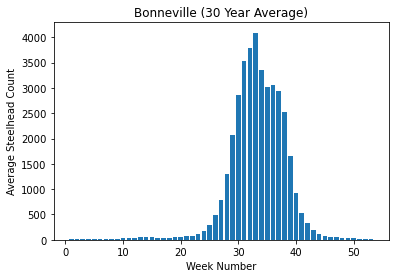

In [16]:
plt.bar(week_df.weeknumber, week_df.stlheadcount)
plt.title('Bonneville (30 Year Average)')
plt.xlabel('Week Number')
plt.ylabel('Average Steelhead Count')
plt.show()

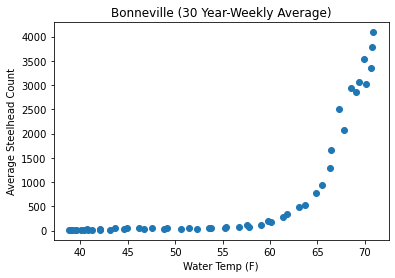

In [31]:
plt.scatter(week_df.watertempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Water Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

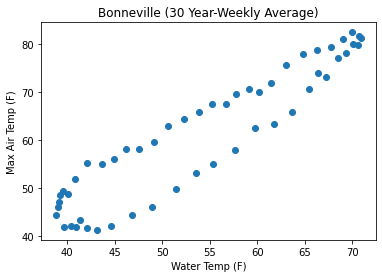

In [29]:
plt.scatter(week_df.watertempf, week_df.maxtempf)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Water Temp (F)')
plt.ylabel('Max Air Temp (F)')
plt.show()

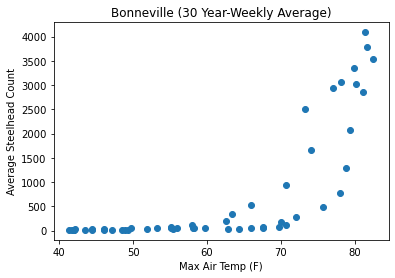

In [25]:
plt.scatter(week_df.maxtempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Max Air Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

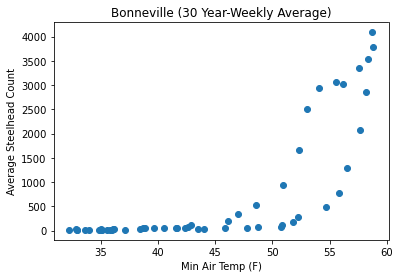

In [26]:
plt.scatter(week_df.mintempf, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Min Air Temp (F)')
plt.ylabel('Average Steelhead Count')
plt.show()

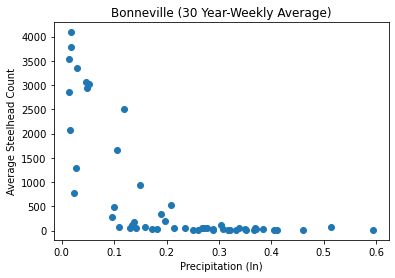

In [27]:
plt.scatter(week_df.precipitationinch, week_df.stlheadcount)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Precipitation (In)')
plt.ylabel('Average Steelhead Count')
plt.show()

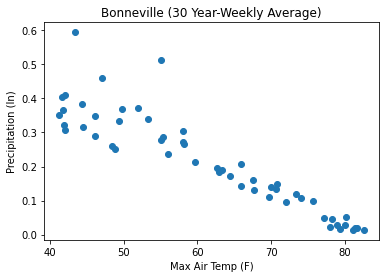

In [34]:
plt.scatter(week_df.maxtempf, week_df.precipitationinch)
plt.title('Bonneville (30 Year-Weekly Average)')
plt.xlabel('Max Air Temp (F)')
plt.ylabel('Precipitation (In)')
plt.show()

# Machine learning

In [ ]:
# Creating features
X = df.drop('Stlhd', axis=1)
X = pd.get_dummies(X)

# Creating target
y = df.loc[:, target].copy()

In [ ]:
X.describe()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
y.describe()

In [ ]:
plt.scatter(df.Week_Number, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:

print(accuracy_score(y_test, y_pred))